In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 602.4 kB/s eta 0:00:00


In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchScraper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기
# 검색어 : '저수율'
# 트위터아이디 : 'k_disastermsg'
# 기간 : since:2022-10-01 until:2023-01-30'
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('가뭄 from:k_disastermsg').get_items()):
    if i>5000:
        break
    tweets_list.append([tweet.date, tweet.content])  
# 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['일시', 'Text'])


<ipython-input-3-771cd51b4778>:14: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.content])


,일시,Text
0,2023-02-05 05:00:30+00:00,[광주광역시청] 물을 계속 틀어놓고 세면대를 이용하거나 양변기에 이물질 버리는 습관...
1,2023-02-02 00:35:01+00:00,[신안군청] 가뭄 위기 극복\n군민 여러분께서는 생활 속 물 사용량 20% 절약 실...
2,2023-01-31 00:58:01+00:00,[신안군청] 가뭄 위기 극복 ▲양치컵 사용▲설거지통 사용▲수도 밸브 수압 저감 등\...
3,2023-01-30 00:57:00+00:00,"[광주광역시] (동복댐 저수율 24.95%)\n수도밸브 수압저감, 양치컵과 설거지통..."
4,2023-01-30 00:31:00+00:00,[신안군청] 가뭄 위기 극복\n군민 여러분께서는 생활 속 물 사용량 20% 절약 실...
...,...,...
83,2022-11-17 07:32:00+00:00,[광주광역시] 시민 여러분의 적극적인 물 절약 실천이 필요합니다. 가정 내 계량기 ...
84,2022-03-12 02:20:15+00:00,"[전남도청] 도내 가뭄 지속, 작은 불씨도 큰 산불로 번질 위험 높음 √산 인근에서..."
85,2022-02-28 06:11:14+00:00,[보성군] 강한 바람과 계속된 가뭄으로 산불위험이 매우 높습니다. ▲산과 가까운 논...
86,2022-02-26 05:03:55+00:00,[보성군] 강한 산불과 계속된 가뭄으로 산불위험이 매우 높습니다. ▲산과 가까운 논...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
tweets_df[['City','1','2']] = tweets_df['Text'].str.partition(sep='[')
tweets_df[['City','1','2']] = tweets_df['2'].str.partition(sep=']')


tweets_city = pd.DataFrame(tweets_df, columns=['City'])
tweets_city

,City
0,광주광역시청
1,신안군청
2,신안군청
3,광주광역시
4,신안군청
...,...
83,광주광역시
84,전남도청
85,보성군
86,보성군


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

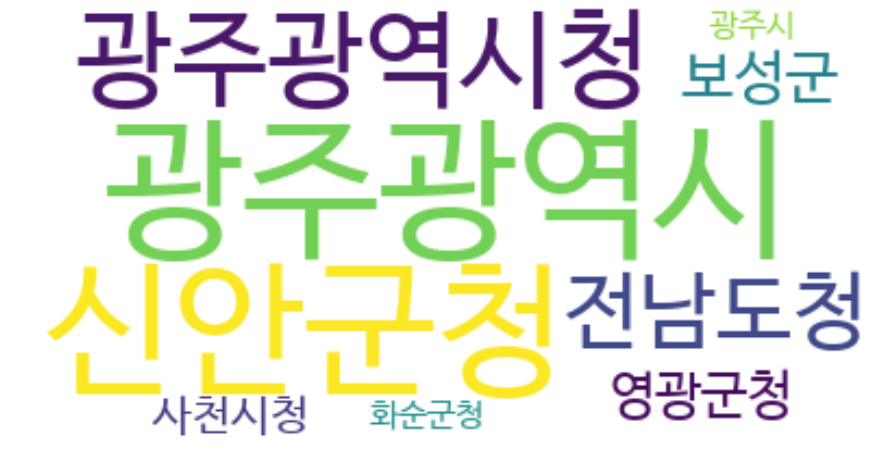

In [20]:
wordcloud = WordCloud(
    font_path = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    background_color='white',
    relative_scaling=0.5
).generate(' '.join(tweets_city['City']))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

tweets_city.to_csv('tweets_city.csv', encoding='utf-8-sig')
tweets_city